<a href="https://colab.research.google.com/github/krishna18122001/Internship-task-1/blob/main/Internship_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df=pd.read_excel('/content/Online Retail.xlsx')

In [ ]:
df.head(7)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceTime,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,08:26:00,4.25,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   InvoiceTime  541909 non-null  object        
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
InvoiceTime         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.shape

(541909, 9)

In [ ]:
df.duplicated().sum()

5268

In [ ]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
InvoiceTime      774
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [ ]:
#Handling missing values
#we have missing values in description and customerid

In [ ]:
#there are many duplicated values in the dataset in the columns quantity, invoice date, invoice time
#and country but they are necessary values which cant be removed
#the customer id consists of many null values but the customer id column cannot be filled with duplicate
#values of values of other orders so we will drop the column

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
InvoiceTime    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df.shape

(406829, 9)

In [ ]:
df.duplicated().sum()

5225

In [ ]:
df['Quantity']

0          6
1          6
2          8
3          6
4          6
          ..
541904    12
541905     6
541906     4
541907     4
541908     3
Name: Quantity, Length: 406829, dtype: int64

In [ ]:
df['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     72,    200,    600,
          480,     -6,     14,     -2,     -4,     -5,     -7,     -3,
           11,     70,    252,     60,    216,    384,     27,    108,
           52,  -9360,     75,    270,     42,    240,     90,    320,
           17,   1824,    204,     69,    -36,   -192,   -144,    160,
         2880,   1400,     19,     39,    -48,    -50,     56,     13,
         1440,     -8,     15,    720,    -20,    156,    324,     41,
          -10,    -72,    -11,    402,    378,    150,    300,     22,
           34,    408,    972,    208,   1008,     26,   1000,    -25,
         1488,    250,   1394,    400,    110,    -14,     37,    -33,
      

In [ ]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceTime,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,11:58:00,1.25,17315.0,United Kingdom


In [ ]:
#there are negative values in our quantity column in our dataframe which have to be corrected
df['Quantity'] = df['Quantity'].abs()

In [ ]:
df.shape

(406829, 9)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceTime,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#we have handled missing values using drop and converted the negative values in the quantity column to
#positive values using abs()

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,13.412279,3.460471,15287.690570
std,248.624170,69.315162,1713.600303
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#visualisation of data

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'InvoiceTime', 'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
country_totals=df.groupby('Country')['Quantity'].sum()

In [ ]:
top_10_countries=country_totals.nlargest(10)

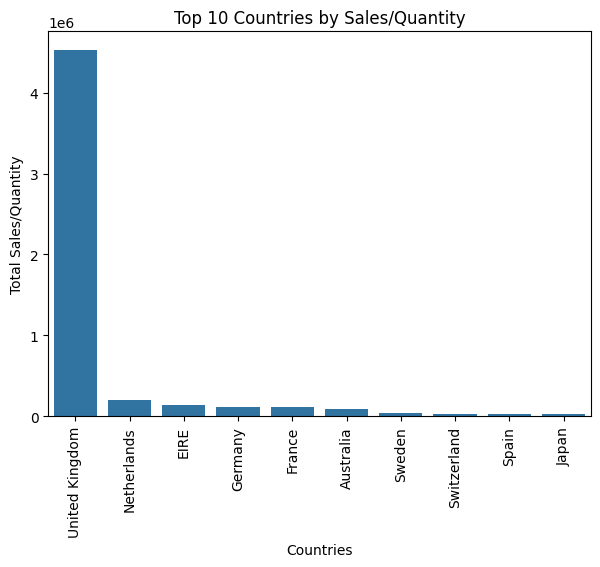

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values)
plt.title('Top 10 Countries by Sales/Quantity')
plt.xlabel('Countries')
plt.ylabel('Total Sales/Quantity')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
max(df.groupby('Country')['Quantity'].sum())

4530411

In [ ]:
top_20_countries=country_totals.nlargest(20)

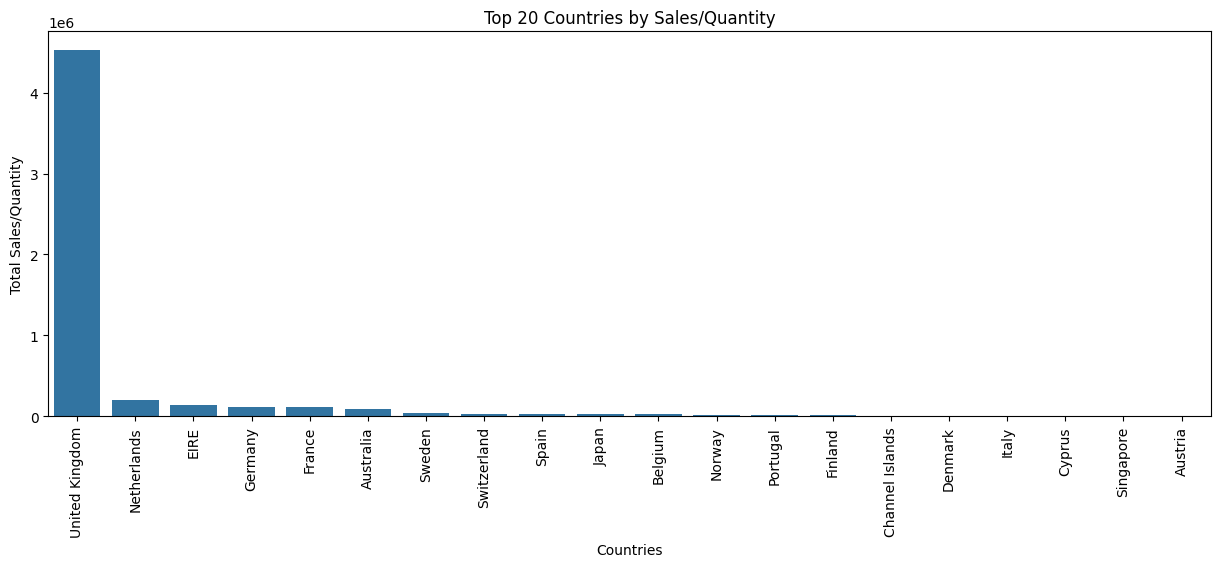

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=top_20_countries.index, y=top_20_countries.values)
plt.title('Top 20 Countries by Sales/Quantity')
plt.xlabel('Countries')
plt.ylabel('Total Sales/Quantity')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.groupby('Country')['Quantity'].sum()

Country
Australia                 84765
Austria                    4935
Bahrain                     260
Belgium                   23322
Brazil                      356
Canada                     2763
Channel Islands            9503
Cyprus                     6405
Czech Republic              750
Denmark                    8282
EIRE                     144721
European Community          501
Finland                   10742
France                   113096
Germany                  121078
Greece                     1558
Iceland                    2458
Israel                     4102
Italy                      8225
Japan                     26814
Lebanon                     386
Lithuania                   652
Malta                       996
Netherlands              201746
Norway                    19429
Poland                     3715
Portugal                  16200
RSA                         352
Saudi Arabia                 85
Singapore                  5248
Spain                     29078


In [ ]:
#as we can see that there is a lot of difference between the orders from other countries and United kingdom

In [ ]:
#so the country with highest sales is united kingdom with the gross sales of 4530411

In [ ]:
products_quantity=df.groupby('Description')['Quantity'].sum()

In [ ]:
top_10_products=products_quantity.nlargest(10)

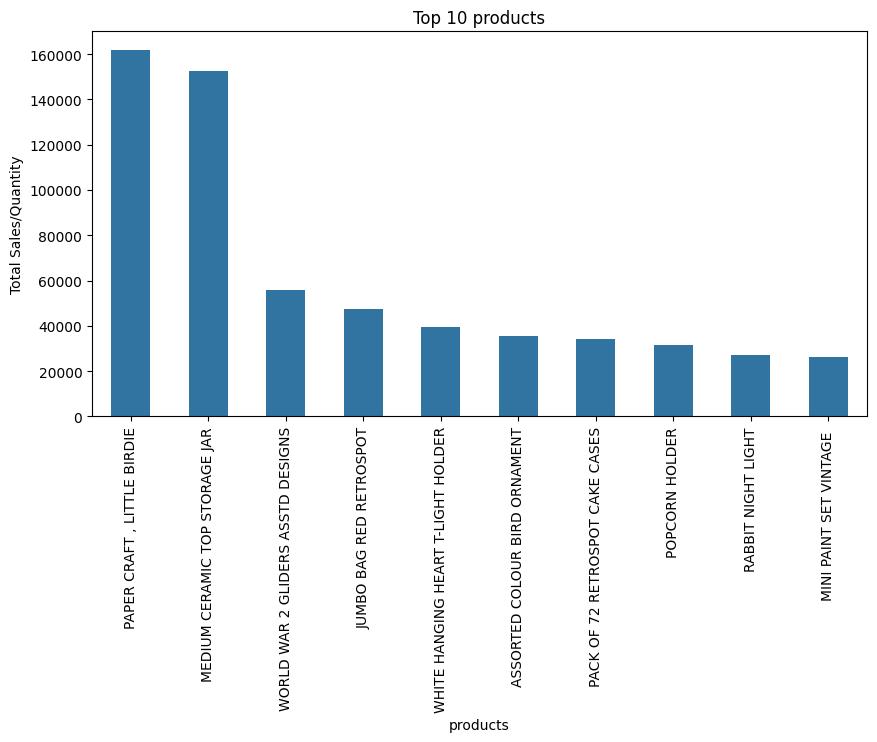

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_products.index, y=top_10_products.values,width=0.5)
plt.title('Top 10 products')
plt.xlabel('products')
plt.ylabel('Total Sales/Quantity')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
type(df['InvoiceDate'])

pandas.core.series.Series

In [ ]:
pd.to_datetime(df['InvoiceDate'])

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [ ]:
type(df['InvoiceDate'])

pandas.core.series.Series

In [ ]:
df['Year']=df['InvoiceDate'].dt.strftime('%Y')

In [ ]:
df['Month']=df['InvoiceDate'].dt.strftime('%m')

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceTime,UnitPrice,CustomerID,Country,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,08:26:00,2.55,17850.0,United Kingdom,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,08:26:00,3.39,17850.0,United Kingdom,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,08:26:00,2.75,17850.0,United Kingdom,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,08:26:00,3.39,17850.0,United Kingdom,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,08:26:00,3.39,17850.0,United Kingdom,2010,12
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,12:50:00,0.85,12680.0,France,2011,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,12:50:00,2.10,12680.0,France,2011,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,12:50:00,4.15,12680.0,France,2011,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,12:50:00,4.15,12680.0,France,2011,12


In [ ]:
import statistics as sc

In [ ]:
sc.mode(df['Month'])

'11'

In [ ]:
#as we can see that the sales happened were mostly in the month of '11' which is november

In [ ]:
sc.mode(df['Year'])

'2011'

In [ ]:
#and in the year 2011 most of the sales were made

<Axes: xlabel='count', ylabel='Month'>

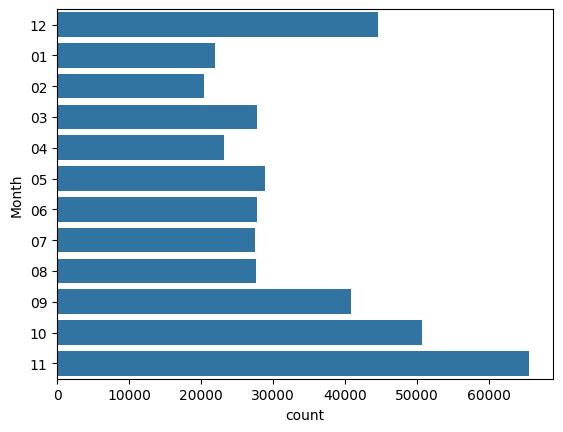

In [ ]:
sns.countplot(df['Month'])

In [ ]:
#as we can see from the countplot which shows the number of sales in each month we can see that the november month is the busiest

In [ ]:
df['Day']=df['InvoiceDate'].dt.strftime('%A')

<Axes: xlabel='count', ylabel='Day'>

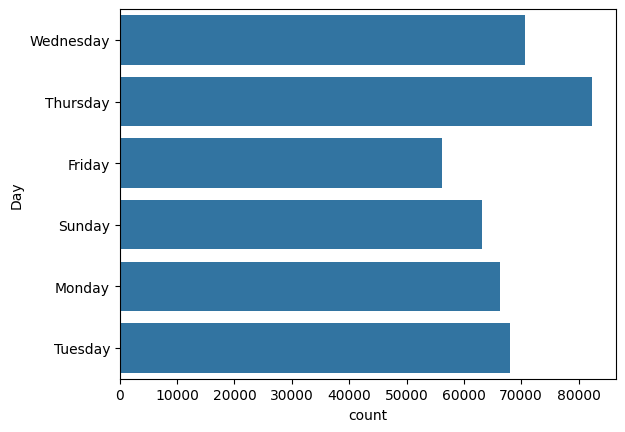

In [ ]:
sns.countplot(df['Day'])

In [ ]:
#The above countplot shows us that we can see that the thursday is the most busiest day

In [ ]:
type(df['Description'])

pandas.core.series.Series

In [ ]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
ANTIQUE RASPBERRY FLOWER EARRINGS        1
WALL ART,ONLY ONE PERSON                 1
GOLD/AMBER DROP EARRINGS W LEAF          1
INCENSE BAZAAR PEACH                     1
PINK BAROQUE FLOCK CANDLE HOLDER         1
Name: Description, Length: 3896, dtype: int64

In [ ]:
#we can see that the WHITE HANGING HEART T-LIGHT HOLDER is the highest occuring item

In [ ]:
#trying to find the top selling product
max(df.groupby('Description')['Quantity'].sum())

161990

In [ ]:
df['Description'].mode()

0    WHITE HANGING HEART T-LIGHT HOLDER
Name: Description, dtype: object

In [ ]:
#The WHITE HANGING HEART T-LIGHT HOLDER is the product which is bought 53847 times which is the highest

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceTime,UnitPrice,CustomerID,Country,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,08:26:00,2.55,17850.0,United Kingdom,2010,12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,08:26:00,3.39,17850.0,United Kingdom,2010,12,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,08:26:00,2.75,17850.0,United Kingdom,2010,12,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,08:26:00,3.39,17850.0,United Kingdom,2010,12,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,08:26:00,3.39,17850.0,United Kingdom,2010,12,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,12:50:00,0.85,12680.0,France,2011,12,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,12:50:00,2.10,12680.0,France,2011,12,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,12:50:00,4.15,12680.0,France,2011,12,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,12:50:00,4.15,12680.0,France,2011,12,Friday


<Axes: >

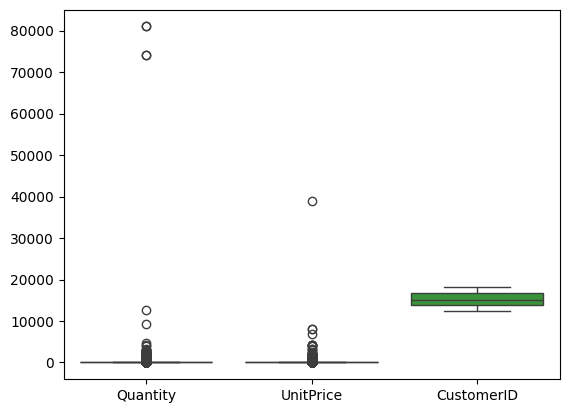

In [ ]:
sns.boxplot(df)

<Axes: xlabel='Quantity', ylabel='Density'>

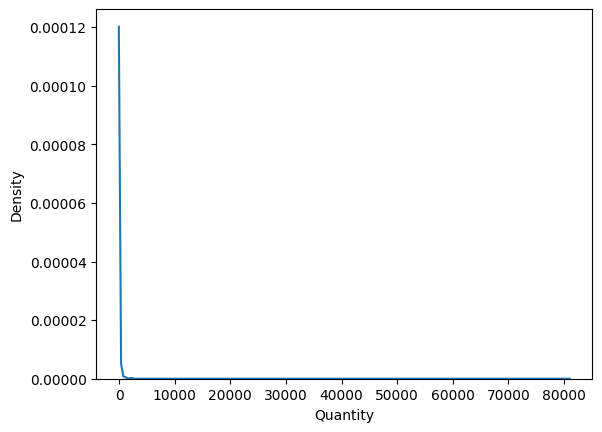

In [ ]:
sns.kdeplot(df['Quantity'])

In [ ]:
#we have found out the outliers in the data frame where we have got only three columns of quantity, unit price and custmerID. we dont have any
#outliers in customerID but in quantity and unit price there are many outliers. The ouliers present in the Quantity column can definitely effect the model
#but the outliers are equally spread out throughout the dataset so the extreme values in the outliers can effect the mean of the model
#I think the positive and negative outliers can out-weigh each other as the box plot shows that outliers present are almost equally
#distributed
#so as the outliers are distributed equally the median might be the good measure of central tendency
#these outliers may also effect while checking the data distribution and kurtosis
#there were many negative values in the quantity column which is not possible so i have taken the absolute value of the negative values
#in the quantity column

In [ ]:
#The statistical operations can only be checked for the quantity and customer id as they are the numerical columns in the data
#From the statistical analysis of the quantity column we have found out that the average quantity sold is 13.41 but this value may have
#slightly gone up or down because of the skewness of the data which is effected by the outliers
#The 25 percent of the items sold are 2
#The 50 percent of the items sold are 5
#The 75 percent of the items sold are 12
#as we can see from the kdeplot the quantity is spread out to a great extent in positive side but most of the data is
#distributed around 0 which means the outliers may have effect on the model's accuracy but very slightly.
#There are outliers in the unitprice column too which means that the mean of the unit price mentioned in the describe method is slightly higher than that
#of the given value.